<a href="https://colab.research.google.com/github/ezigou/Data-Science-Techniques-and-Applications-Part-1/blob/main/DSTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
set_option('precision',3)
set_option('display.width',100)

In [ ]:
data=read_csv('tumor.csv')
print(data.shape)
print(data.groupby('Class').size())


(683, 11)
Class
2    444
4    239
dtype: int64


In [ ]:
data=data.drop(columns='Sample code number')

In [ ]:
correlations=data.corr(method='pearson')
correlations

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000,0.642,0.653,0.488,0.524,0.593,0.554,0.534,0.351,0.715
Uniformity of Cell Size,0.642,1.000,0.907,0.707,0.754,0.692,0.756,0.719,0.461,0.821
Uniformity of Cell Shape,0.653,0.907,1.000,0.686,0.722,0.714,0.735,0.718,0.441,0.822
Marginal Adhesion,0.488,0.707,0.686,1.000,0.595,0.671,0.669,0.603,0.419,0.706
Single Epithelial Cell Size,0.524,0.754,0.722,0.595,1.000,0.586,0.618,0.629,0.481,0.691
Bare Nuclei,0.593,0.692,0.714,0.671,0.586,1.000,0.681,0.584,0.339,0.823
Bland Chromatin,0.554,0.756,0.735,0.669,0.618,0.681,1.000,0.666,0.346,0.758
Normal Nucleoli,0.534,0.719,0.718,0.603,0.629,0.584,0.666,1.000,0.434,0.719
Mitoses,0.351,0.461,0.441,0.419,0.481,0.339,0.346,0.434,1.000,0.423
Class,0.715,0.821,0.822,0.706,0.691,0.823,0.758,0.719,0.423,1.000


In [ ]:
correlations.to_excel("correlations.xlsx")

Text(0.5, 1.0, 'Correlation Matrix Plot')

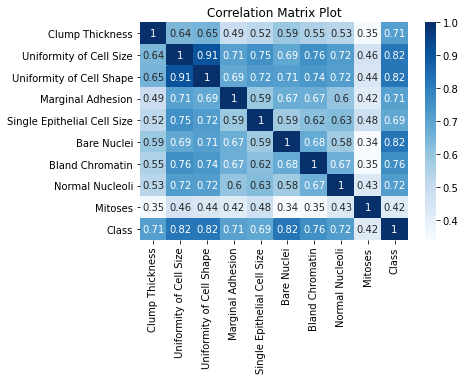

In [ ]:
sns_plt = plt.axes()
sns_plt = sns.heatmap(correlations, annot=True, cmap=plt.cm.Blues, ax=sns_plt)
sns_plt.set_title('Correlation Matrix Plot')

In [ ]:
dic_names = {index: value for index, value in enumerate(data.columns)}
dic_names

{0: 'Clump Thickness',
 1: 'Uniformity of Cell Size',
 2: 'Uniformity of Cell Shape',
 3: 'Marginal Adhesion',
 4: 'Single Epithelial Cell Size',
 5: 'Bare Nuclei',
 6: 'Bland Chromatin',
 7: 'Normal Nucleoli',
 8: 'Mitoses',
 9: 'Class'}

                      Features  Score
0                  Bare Nuclei  0.248
1     Uniformity of Cell Shape  0.180
2      Uniformity of Cell Size  0.156
3            Marginal Adhesion  0.114
4              Clump Thickness  0.082
5              Normal Nucleoli  0.081
6              Bland Chromatin  0.079
7  Single Epithelial Cell Size  0.050
8                      Mitoses  0.010


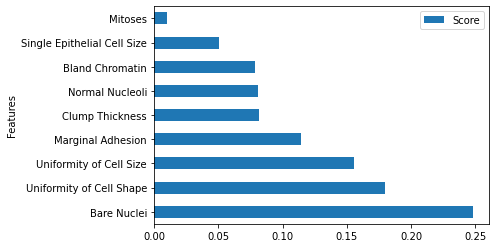

In [ ]:
def extra_trees_classifier(data_fun):
  # Feature Importance calculation

  data=data_fun.values
  x=data[:,0:9]
  y=data[:,9]

  model = ExtraTreesClassifier(random_state=21)
  tree=model.fit(x,y)
  #print(model.feature_importances_)

  dfscores = pd.DataFrame(tree.feature_importances_)
  df = pd.DataFrame(x)
  dfcolumns = pd.DataFrame(df.columns)
  
  # concat two dataframes for better visualization 
  featureScores = pd.concat([dfcolumns,dfscores],axis=1)
  # naming the dataframe columns
  featureScores.columns = ['Features','Score']  
  featureScores=featureScores.nlargest(9,'Score')

  featureScores.reset_index(drop=True, inplace=True)
  dic_names = {key:value for key, value in enumerate(data_fun.columns)}
  featureScores['Features'] = featureScores['Features'].apply(lambda x: dic_names[x])
  print(featureScores)

  ax = featureScores.plot.barh(x='Features', y='Score', rot=0)

extra_trees_classifier(data)

In [ ]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000,683.000
mean,4.442,3.151,3.215,2.830,3.234,3.545,3.445,2.870,1.603,2.700
std,2.821,3.065,2.989,2.865,2.223,3.644,2.450,3.053,1.733,0.955
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000
25%,2.000,1.000,1.000,1.000,2.000,1.000,2.000,1.000,1.000,2.000
50%,4.000,1.000,1.000,1.000,2.000,1.000,3.000,1.000,1.000,2.000
75%,6.000,5.000,5.000,4.000,4.000,6.000,5.000,4.000,1.000,4.000
max,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,4.000


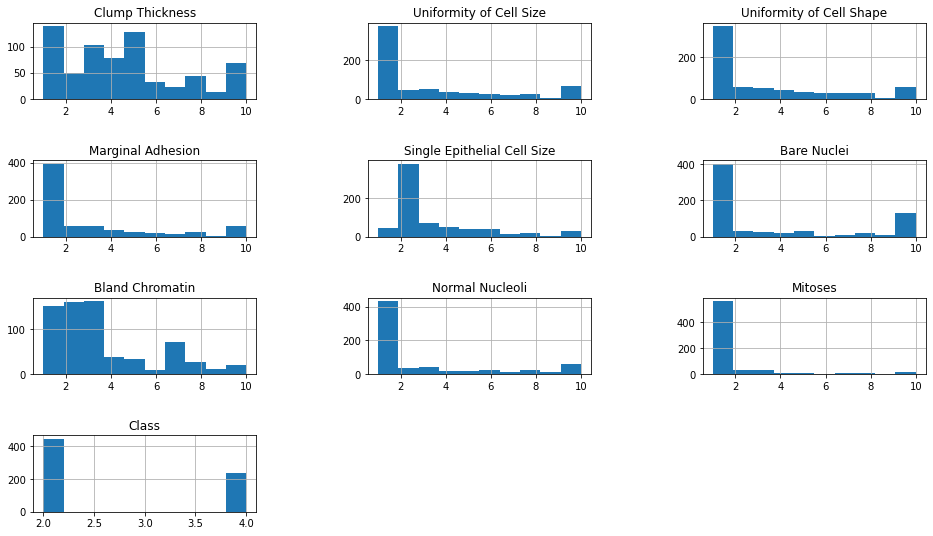

In [ ]:
data.hist(layout=(4,3),figsize=(16,9))
pyplot.subplots_adjust(hspace=.8, wspace=.5)
pyplot.show()

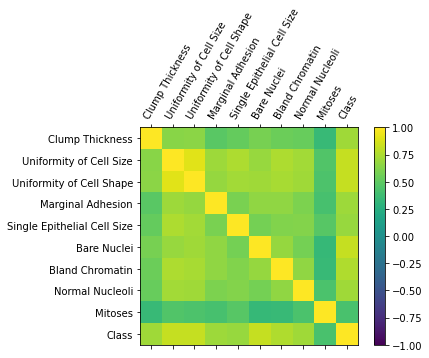

<Figure size 432x288 with 0 Axes>

In [ ]:
fig=pyplot.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1, vmax=1)
fig.colorbar(cax)
#ticks=numpy.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names=data.columns
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.setp(ax.get_xticklabels(), rotation=60, ha="left",rotation_mode="anchor")
plt.show()
plt.savefig('Correlation Matrix')

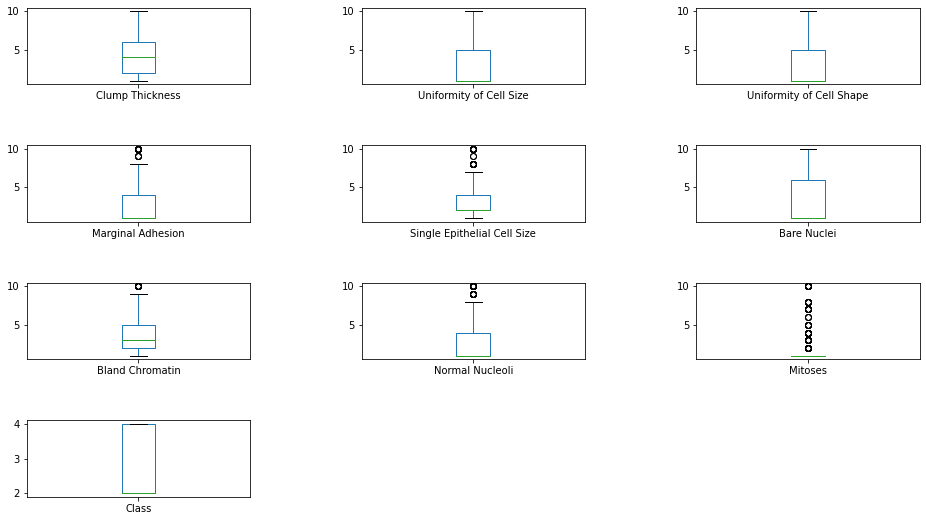

In [ ]:
data.plot(kind='box', subplots=True, layout=(4,3),figsize=(16,9), sharex=False, sharey=False)
pyplot.subplots_adjust(hspace=.8, wspace=.5)
pyplot.show()

In [ ]:
data_benign = data[data["Class"]==2]
data_malignant = data[data["Class"]==4]

benign_array=data_benign.values
x_benign=benign_array[:,0:9]
y_benign=benign_array[:,9]

malignant_array=data_malignant.values
x_malignant= malignant_array[:,0:9]
y_malignant=malignant_array[:,9]